In [2]:
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [3]:
df = pd.read_csv("data/employee_headers_long.csv")
df["pais_from"] = df["from"].str.slice(start=-6)
df["pais_to"] = df["to"].str.slice(start=-6)
employees = pd.read_excel("data/EmployeeRecords.xlsx")
employees.head()

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate
0,Bramar,Mat,1981-12-19,Tethys,Male,Tethys,BirthNation,1981-12-19,Tethys,2007-12-12,2017-12-11,Administration,Assistant to CEO,2005-07-01,Mat.Bramar@gastech.com.kronos,NaN,NaN,NaT
1,Ribera,Anda,1975-11-17,Tethys,Female,Tethys,BirthNation,1975-11-17,Tethys,2009-06-15,2019-06-14,Administration,Assistant to CFO,2009-10-30,Anda.Ribera@gastech.com.kronos,NaN,NaN,NaT
2,Pantanal,Rachel,1984-08-22,Tethys,Female,Tethys,BirthNation,1984-08-22,Tethys,2013-06-13,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT
3,Lagos,Linda,1980-01-26,Tethys,Female,Tethys,BirthNation,1980-01-26,Tethys,2009-11-01,2019-10-31,Administration,Assistant to COO,2010-02-01,Linda.Lagos@gastech.com.kronos,NaN,NaN,NaT
4,Mies Haber,Ruscella,1964-04-26,Kronos,Female,Kronos,BirthNation,1964-04-26,NaN,NaT,NaT,Administration,Assistant to Engineering Group Manager,2003-04-02,Ruscella.Mies.Haber@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,1984-10-01


In [4]:
attr_data = employees[["BirthCountry", "CitizenshipCountry", "CurrentEmploymentTitle","MilitaryServiceBranch","MilitaryDischargeType", "EmailAddress"]]
def left_join(from_o_to, left_data, right_data):
    right_data=right_data.add_suffix("_" +from_o_to)
    return pd.merge(left_data, right_data, how="left", left_on = from_o_to, right_on = "EmailAddress_"+from_o_to)


df=left_join("from",df, attr_data)
df=left_join("to",df, attr_data)


In [5]:
nodos = pd.Series(np.unique(df[['to', 'from']].values), name="nodos").to_frame()
nodos=pd.merge(nodos, attr_data, how="left",left_on ="nodos",right_on="EmailAddress")

In [6]:
G = nx.DiGraph()
for index, row in nodos.iterrows():
    G.add_node(row['nodos'], birth_country=row['BirthCountry'],
              citizenship_country = row['CitizenshipCountry'],
              curr_employment = row['CurrentEmploymentTitle'],
              military_service = row['MilitaryServiceBranch'],
              military_discharge = row['MilitaryDischargeType'])

In [7]:
for index, row in df.iterrows():
    G.add_edge(row["from"], row["to"])

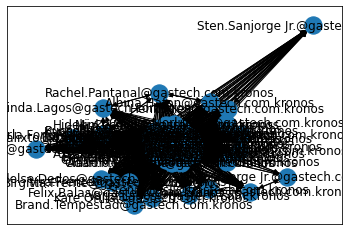

In [8]:
nx.draw_networkx(G)

In [ ]:
#Visualizacion
